In [1]:
import openmc

In [2]:
model = openmc.model.Model()

uo2 = openmc.Material(name='UO2')
uo2.set_density('g/cm3', 10.0)
uo2.add_nuclide('U235', 1.0)
uo2.add_nuclide('O16', 2.0)
water = openmc.Material(name='light water')
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)
water.set_density('g/cm3', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')
model.materials.extend([uo2, water])

rc = 0.4
h = 1.5
cyl = openmc.ZCylinder(r=rc)
top = openmc.ZPlane(z0=h)
bottom = openmc.ZPlane(z0=0.)
pellet = -cyl & -top & +bottom
water_slice = +cyl & -top & +bottom

fuel = openmc.Cell(fill=uo2, region=pellet)
water_reflector = openmc.Cell(fill=water, region=water_slice)
layer = openmc.Universe(cells=[fuel, water_reflector])

n_pellets = 200

top = openmc.ZPlane(z0 = n_pellets * h)
tb_refl = openmc.Cell(fill=water, region=-bottom | +top)

#outer_cell = openmc.Cell(fill=water, region=+box)

univs = [layer] * n_pellets
pellet_stack = openmc.StackLattice()
pellet_stack.central_axis = (0., 0.)
pellet_stack.base_coordinate = 0.
pellet_stack.universes = univs
pellet_stack.is_uniform = True
pellet_stack.pitch = h
#pellet_stack.outer = openmc.Universe(cells=[outer_cell])

stack_cell = openmc.Cell(fill=pellet_stack)

pin_univ = openmc.Universe(cells=[stack_cell, tb_refl])
d = 1.5 * rc

box = openmc.model.RectangularParallelepiped(-d, d, -d, d,
                                          0. - d, n_pellets * h + d,
                                          boundary_type='reflective')


main_cell = openmc.Cell(fill=pin_univ, region=-box)
model.geometry = openmc.Geometry([main_cell])

model.settings.batches = 10
model.settings.inactive = 5
model.settings.particles = 1000

model.export_to_xml()

In [39]:
pellet_stack._layer_boundaries

array([0. , 1.5])

In [31]:
box.zmax

Surface
	ID             =	60
	Name           =	
	Type           =	z-plane
	Boundary       =	reflective
	Coefficients   
z0              =	2.1

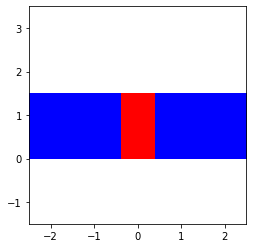

In [40]:
pin_univ.plot(width=(5.,5.), origin=(0.,0.,1.), basis='xz', color_by='material', colors={uo2: 'red', water: 'blue'})

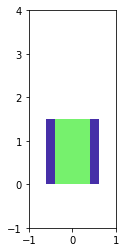

In [41]:
#import pdb
#pdb.set_trace()
model.geometry.root_universe.plot(width=(2.,5.), origin=(0.,0.,1.5), basis='xz', color_by='material')

In [12]:
pellet_stack._layer_boundaries

array([0., 1., 3.])

In [21]:
import numpy as np
pellet_stack.universes[0] == pellet_stack.universes[1]

True

In [25]:
universes

NameError: name 'universes' is not defined

In [15]:
pellet_stack._orientation_idx

2

In [5]:
plotxy = openmc.Plot()
plotxy.basis = 'xy'
plotxy.origin = (0., 0., 1.)
plotxy.width = (5., 5.)
plotxy.pixels = (400, 400)
plotxy.color_by = 'material'

plotxy.colors = {
    uo2: 'red',
    water: 'blue'
}
plotxy.filename = 'xy'

plotxz = openmc.Plot()
plotxz.basis = 'xz'
plotxz.origin = (0., 0., 1.)
plotxz.width = (5., 5.)
plotxz.pixels = (400, 400)
plotxz.color_by = 'material'

plotxz.colors = {
    uo2: 'red',
    water: 'blue'
}
plotxz.filename = 'xz'

plots = openmc.Plots([plotxy, plotxz])
plots.export_to_xml()

In [13]:
model.export_to_xml()

In [3]:
type(pellet_stack.universes)

NameError: name 'pellet_stack' is not defined

In [29]:
np.asarray(pellet_stack.universes)

array([Universe
       	ID             =	1
       	Name           =
       	Geom           =	CSG
       	Cells          =	[1, 2], Universe
                                 	ID             =	1
                                 	Name           =
                                 	Geom           =	CSG
                                 	Cells          =	[1, 2]], dtype=object)

In [2]:
sp = openmc.StatePoint('statepoint.10.h5')

In [4]:
sp.k_combined

1.8398702113607215+/-0.0061415075113124724